### Creating a Directory Dataset using a Data from CSV file

In [1]:
import pandas as pd
import os

In [2]:
import cv2

#### Creating the Directory Structure

In [3]:
parent_directory = r'.\face-expression-recognition-dataset\fer_directory'

In [4]:
emo_code_dict = {0:"Angry", 1:'Disgust', 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}

In [95]:
os.mkdir(os.path.join(parent_directory, 'Training'))

os.mkdir(os.path.join(parent_directory, 'Validation'))

os.mkdir(os.path.join(parent_directory, 'Test'))

#### Loading the DataFrame

In [8]:
csv_path = r'..\face-expression-recognition-dataset\fer2013\fer2013.csv'
df = pd.read_csv(csv_path)

#### Creating a folder for each target class

In [97]:
for emo in df.emotion.unique():
    os.mkdir(os.path.join(parent_directory+'\Training', emo_code_dict[emo])) 
    os.mkdir(os.path.join(parent_directory+'\Validation', emo_code_dict[emo]))     
    os.mkdir(os.path.join(parent_directory+'\Test', emo_code_dict[emo]))     

#### Parsing the DataFrame and saving the images in their respective folders

In [191]:
for row in df.itertuples():
    if row.Usage == 'Training':
        image_folder = parent_directory + '\Training\\' + emo_code_dict[row.emotion] + '\\'
        cv2.imwrite(image_folder + str(row.Index) +'.jpg', row.pixels.reshape((48,48,1)))
    
    elif row.Usage == 'PublicTest':
        image_folder = parent_directory + '\Validation\\' + emo_code_dict[row.emotion] + '\\'
        cv2.imwrite(image_folder + str(row.Index) +'.jpg', row.pixels.reshape((48,48,1)))
        
    elif row.Usage == 'PrivateTest':
        image_folder = parent_directory + '\Test\\'+ emo_code_dict[row.emotion] + '\\'
        cv2.imwrite(image_folder + str(row.Index) +'.jpg', row.pixels.reshape((48,48,1)))


#### Loading a saved Image to test the result of above Process

In [12]:
import matplotlib.pyplot as plt

(48, 48, 3)


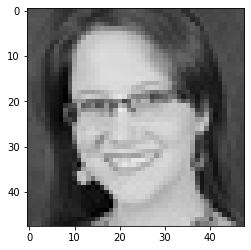

In [13]:
img_example2 = cv2.imread(r'..\face-expression-recognition-dataset\fer_directory\Training\Happy\7.jpg')
img_example2
print(img_example2.shape)
plt.imshow(img_example2);